In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler


C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) 

In [2]:
df = pd.read_csv('using_time.csv')
print(df.shape)
print(df.info())
df.head()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1047942, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047942 entries, 0 to 1047941
Data columns (total 9 columns):
품명           292 non-null object
수주일          292 non-null object
완료
(확정일)     292 non-null object
진행
확인        292 non-null object
Serial No    292 non-null object
단가           292 non-null object
고장 관련 부품     292 non-null object
수리시간         292 non-null float64
사용기간         292 non-null float64
dtypes: float64(2), object(7)
memory usage: 72.0+ MB
None


,품명,수주일,완료 (확정일),진행 확인,Serial No,단가,고장 관련 부품,수리시간,사용기간
0,A2 Rev 분리형,2017-10-10,2017-10-25,완료,100712,"8,152,500",Source,15.0,243.0
1,A2 Rev 분리형,2017-09-07,2017-09-26,완료,100726,"8,666,500",Source,19.0,472.0
2,A2 Rev 일체형,2016-04-05,2016-04-20,완료,100730,0,Preventive maintenance,15.0,158.0
3,A2 Rev 분리형,2017-04-03,2017-04-28,완료,100741,0,Etc,25.0,357.0
4,A2 Rev 분리형,2019-07-22,2019-07-26,완료,100742,"7,234,700",Reflector,4.0,993.0


In [3]:
df.dropna(inplace = True)

In [4]:
df.shape

(292, 9)

In [5]:
df.describe()

,수리시간,사용기간
count,292.000000,292.000000
mean,21.154110,321.099315
std,10.222955,278.311330
min,0.000000,4.000000
25%,15.000000,95.750000
50%,19.000000,231.500000
75%,27.000000,497.000000
max,56.000000,1270.000000


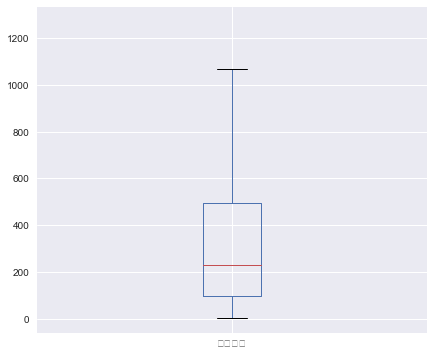

In [6]:
## IQR  = 401.25
## outlier data 기준 1065

plt.figure(figsize =(7,6))
boxplot = df.boxplot(column = ['사용기간'])
# plt.yticks(np.arange(0,101, step = 5))
plt.show()

In [7]:
df[df['사용기간'] >= 1065]

,품명,수주일,완료 (확정일),진행 확인,Serial No,단가,고장 관련 부품,수리시간,사용기간
19,A2 Rev 분리형,2018-11-29,2018-12-12,완료,110207,"8,360,500",Reflector,13.0,1190.0
29,A2 Rev 분리형,2019-01-14,2019-02-01,완료,110340,"8,360,500",Reflector,18.0,1172.0
68,A2 Rev 분리형,2019-03-06,2019-03-20,완료,110557,"8,360,500",Reflector,14.0,1113.0
82,A2 Rev 분리형,2019-07-25,2019-07-30,완료,1107015,"7,483,700",Source,5.0,1126.0
100,A2 CF 싱글,2019-07-08,2019-07-17,완료,1107189,"8,222,600",Reflector,9.0,1270.0
118,A2 Rev 분리형,2019-03-04,2019-03-15,완료,1207009,"10,595,300",Source,11.0,1173.0
123,A2 Rev 분리형,2019-02-27,2019-03-11,완료,1207019,"7,601,000",Source,12.0,1065.0
232,A2 Rev 분리형,2019-02-11,2019-02-28,완료,A13193R,"8,360,500",Reflector,17.0,1152.0


In [8]:
df.drop([19,29,68,82,100,118,123,232], inplace = True)
df.shape

(284, 9)

In [9]:
df.describe()

,수리시간,사용기간
count,284.000000,284.000000
mean,21.401408,297.535211
std,10.236469,243.345533
min,0.000000,4.000000
25%,15.000000,93.750000
50%,20.000000,216.500000
75%,28.000000,476.250000
max,56.000000,1036.000000


In [10]:
df[df['사용기간'] <= 30]

,품명,수주일,완료 (확정일),진행 확인,Serial No,단가,고장 관련 부품,수리시간,사용기간
34,A2 CF 싱글,2017-10-11,2017-10-26,완료,110347,0,Etc,15.0,12.0
49,A2 CF 싱글,2017-08-25,2017-09-06,완료,110436,0,Cooling Line,12.0,22.0
57,A2 Rev 분리형,2016-05-23,2016-07-15,완료,110457,0,Preventive maintenance,53.0,13.0
92,A2 Rev 분리형,2016-04-20,2016-05-12,완료,1107118,0,Preventive maintenance,22.0,9.0
107,A2 Rev 분리형,2016-04-11,2016-05-10,완료,1107247,"5,400,000",Etc,29.0,19.0
121,A2 Rev 분리형,2017-09-22,2017-09-29,완료,1207013,"3,585,900",Reflector,7.0,4.0
122,A2 Rev 분리형,2017-10-19,2017-11-22,완료,1207013,"8,152,500",Source,34.0,20.0
146,A2 CF 듀얼,2018-02-28,2018-03-12,완료,A13026C,0,Etc,12.0,21.0
150,A2 Rev 분리형,2017-11-15,2017-12-06,완료,A13029R,"2,772,000",Feed Through,21.0,12.0
156,A2 CF 듀얼,2018-05-25,2018-06-27,완료,A13050C,"713,200",Feed Through,33.0,16.0


In [11]:
df['품명 '].unique()

array(['A2 Rev 분리형', 'A2 Rev 일체형', 'A2 Rev 분리형 ', 'A2 CF 듀얼',
       'A1 Rev 일체형', 'A2 CF 싱글', 'A1 CF 싱글', 'A3 Rev 듀얼'], dtype=object)

In [12]:
print(len(df['고장 관련 부품'].unique()))
df['고장 관련 부품'].unique()

8


array(['Source', 'Preventive maintenance', 'Etc', 'Reflector', 'Change',
       '22,222,222 ', 'Cooling Line', 'Feed Through'], dtype=object)

In [13]:
df.groupby('품명 ')[['사용기간']].describe()

사용기간                                                        \
            count        mean         std    min     25%    50%     75%   
품명                                                                        
A1 CF 싱글      2.0  190.500000  170.412734   70.0  130.25  190.5  250.75   
A1 Rev 일체형    2.0  408.000000  271.529004  216.0  312.00  408.0  504.00   
A2 CF 듀얼     82.0  190.829268  157.995843   16.0   77.25  130.0  250.50   
A2 CF 싱글     42.0  293.047619  232.718605   12.0   87.75  250.5  473.75   
A2 Rev 분리형   82.0  436.731707  292.985360    4.0  171.00  454.5  657.00   
A2 Rev 분리형   14.0  300.857143  138.246078   98.0  181.25  308.5  393.00   
A2 Rev 일체형   19.0  392.052632  213.500579   43.0  254.00  350.0  574.50   
A3 Rev 듀얼    41.0  192.048780  172.803349    8.0   68.00  135.0  295.00   

                     
                max  
품명                   
A1 CF 싱글      311.0  
A1 Rev 일체형    600.0  
A2 CF 듀얼      634.0  
A2 CF 싱글      809.0  
A2 Rev 분리형   1036.0  
A2 Rev 분리형    510.0  
A2 Rev 일체형    761.0  
A3 Rev 듀얼     764.0

In [14]:
print(len(df[df['고장 관련 부품'] == 'Etc']))
print(len(df[df['고장 관련 부품'] == 'Source']))
print(len(df[df['고장 관련 부품'] == 'Preventive maintenance']))
print(len(df[df['고장 관련 부품'] == 'Reflector']))
print(len(df[df['고장 관련 부품'] == 'Change']))
print(len(df[df['고장 관련 부품'] == 'Cooling Lin']))
print(len(df[df['고장 관련 부품'] == 'Feed Throug']))
print(len(df[df['고장 관련 부품'] == '22,222,222']))
print(len(df[df['고장 관련 부품'] == 'Etc']))

19
111
24
112
1
0
0
0
19


In [15]:
len(df[df['품명 '] == 'A2 Rev 분리형'])

82

In [16]:
len(df[df['품명 '] == 'A2 Rev 분리형 '])

14

In [17]:
df[df['품명 '] == 'A2 Rev 분리형 ']['품명 '].replace({'A2 Rev 분리형 ':'A2 Rev 분리형'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
df[df['품명 '] == 'A2 Rev 분리형 ']['품명 ']

3      A2 Rev 분리형 
6      A2 Rev 분리형 
12     A2 Rev 분리형 
23     A2 Rev 분리형 
32     A2 Rev 분리형 
43     A2 Rev 분리형 
73     A2 Rev 분리형 
75     A2 Rev 분리형 
78     A2 Rev 분리형 
90     A2 Rev 분리형 
109    A2 Rev 분리형 
174    A2 Rev 분리형 
198    A2 Rev 분리형 
211    A2 Rev 분리형 
Name: 품명 , dtype: object

In [19]:
df.groupby('품명 ')[['사용기간']].describe()

사용기간                                                        \
            count        mean         std    min     25%    50%     75%   
품명                                                                        
A1 CF 싱글      2.0  190.500000  170.412734   70.0  130.25  190.5  250.75   
A1 Rev 일체형    2.0  408.000000  271.529004  216.0  312.00  408.0  504.00   
A2 CF 듀얼     82.0  190.829268  157.995843   16.0   77.25  130.0  250.50   
A2 CF 싱글     42.0  293.047619  232.718605   12.0   87.75  250.5  473.75   
A2 Rev 분리형   82.0  436.731707  292.985360    4.0  171.00  454.5  657.00   
A2 Rev 분리형   14.0  300.857143  138.246078   98.0  181.25  308.5  393.00   
A2 Rev 일체형   19.0  392.052632  213.500579   43.0  254.00  350.0  574.50   
A3 Rev 듀얼    41.0  192.048780  172.803349    8.0   68.00  135.0  295.00   

                     
                max  
품명                   
A1 CF 싱글      311.0  
A1 Rev 일체형    600.0  
A2 CF 듀얼      634.0  
A2 CF 싱글      809.0  
A2 Rev 분리형   1036.0  
A2 Rev 분리형    510.0  
A2 Rev 일체형    761.0  
A3 Rev 듀얼     764.0

## ARIMA 모형 

In [2]:
## df1 = time_weeks_1

df1 = pd.read_csv('time_weeks_1.csv')
print(df1.shape)
df1.head()

(224, 3)


,일자,주,수량
0,2015-04-18,1,1
1,2015-04-25,2,0
2,2015-05-02,3,1
3,2015-05-09,4,0
4,2015-05-16,5,0


In [3]:
## df2 = time_data_4

df2 = pd.read_csv('time_data_4.csv')
print(df2.shape)
df2.head()

(1566, 12)


,수주일,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,공휴일
0,2015-04-18,0,4,18,0,0,0,0,0,1,0,0
1,2015-04-19,0,4,19,0,0,0,0,0,0,1,0
2,2015-04-20,0,4,20,1,0,0,0,0,0,0,0
3,2015-04-21,1,4,21,0,1,0,0,0,0,0,0
4,2015-04-22,0,4,22,0,0,1,0,0,0,0,0


In [4]:
df2['수주일'] = pd.to_datetime(df2['수주일'], format = '%Y-%m-%d')

In [5]:
df2.set_index('수주일', inplace = True)
df2['년'] = df2.index.year

In [6]:
df2.head()

,수량,월,일,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,공휴일,년
수주일,,,,,,,,,,,,
2015-04-18,0,4,18,0,0,0,0,0,1,0,0,2015
2015-04-19,0,4,19,0,0,0,0,0,0,1,0,2015
2015-04-20,0,4,20,1,0,0,0,0,0,0,0,2015
2015-04-21,1,4,21,0,1,0,0,0,0,0,0,2015
2015-04-22,0,4,22,0,0,1,0,0,0,0,0,2015


In [7]:
df3 = df2.groupby(['년','월'])[['수량']].sum()

In [8]:
df3.head()

수량
년    월    
2015 4   1
     5   1
     6   1
     7   0
     8  14

In [9]:
df4 = df2.groupby(['년','월'], as_index = False)['수량'].sum()
df4.head()

,년,월,수량
0,2015,4,1
1,2015,5,1
2,2015,6,1
3,2015,7,0
4,2015,8,14


In [10]:
df4.rename(columns = {'년':'year', '월':'month', '수량':'count'}, inplace = True)

In [11]:
df4.head()

,year,month,count
0,2015,4,1
1,2015,5,1
2,2015,6,1
3,2015,7,0
4,2015,8,14


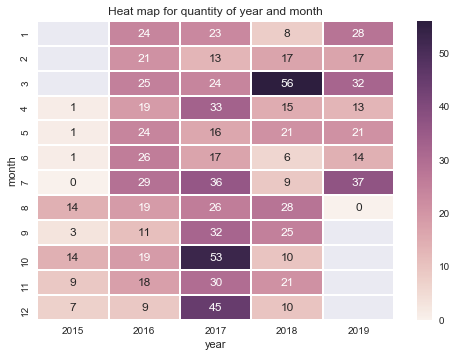

In [12]:
# 대체 계절성이 있는거냐? 

time = df4.pivot("month", "year", "count")
plt.title("Heat map for quantity of year and month")
sns.heatmap(time, annot=True, linewidths=1)
plt.show()

white nosie의 경향을 보이는 cell repair data

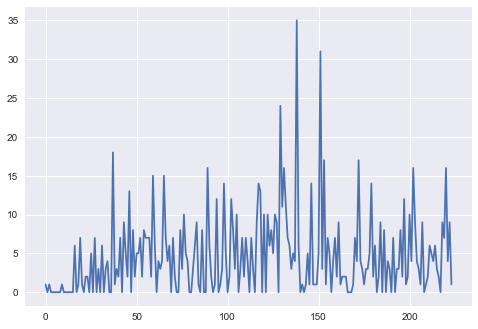

In [13]:
# 대체 계절성이 있는거야? 추세가 ???

plt.plot(df1['수량'])
plt.show()

## 값이 상승하면서 분산도 증가하지만 이게 증가했다가 줄었다가 
## 정확히 일정한 패턴이 없음을 확인 할 수 있다. 

# 일단 우리는 시간이 지남에 따라 분산이 변화하는 랜덤워크 시계열임을 알 수 있다. -> 추세는? 맨 마지막줄이 핵심!! 
# 시간이 지남에따라 평균도 변화하지않나? 하지만 대부분 월 10~ 20 사이에 있다. 추세를 가진다고 봐야하나?
# 아니다. 우리는 추세와 분산이 커지는 시계열 데이터이다! 즉 백색잡음!!! white nosie!! 



## 아닌가? 우린 백색잡음 시계열인가 아니면 랜덤워크인건가 너무 헷갈린다... 하긴 평균이 커지는 데이터는 아니니까 
## 분산이 변화하는 랜덤워크 시계열이 더 맞는 표현이겠다. 
## 그럼 랜덤워크니까 

정상성을 확보하는 것이 중요하기 때문에 정상성을 갖지 않는 시계열 데이터를 정상 시계열로 돌리는데 다음과 같은 기법이 동원된다.

- 로그변환: log(Yt) 을 통해 분산이 커지는 경향을 갖는 시계열을 안정화 시킴.
- 차분: diff(Yt) 을 통해 차분을 하계 되면 추세를 제거하는 효과를 거둠.
- 계절차분: diff(Yt,s) 을 통해 계절 차분을 하계 되면 계절추세를 제거하는 효과를 거둠.

In [14]:
time = df1.pivot("month", "year", "count")
plt.title("Heat map for quantity of year and month")
sns.heatmap(time, annot=True, linewidths=1)
plt.show()

KeyError: 'month'

## 분석 절차 --------------------------------------------------------------------------

[0단계] 평균과 분산의 정상성

 - 시계열 자료에 대한 정상성(stationarity) 확인

 - 비정상적인 시계열 자료는 변수변환 및 차분



[1단계] 모형 식별

  - 관측값들 사이에 존재하는 상관관계를 측정

  - p(자기회귀요소, autoregressive, AR)와 q(이동평균요소, moving average, MA)를 결정



[2단계] 모수 추정

  -  추정된 모수에 대한 검정을 통해 1차적으로 모형의 적절성을 탐색

  -  추정된 모수가 유의하지 않을 경우, 식별 단계로 돌아가 다른 모형을 선별



[3단계] 모형 진단

  -  몇 가지 검정법에 근거하여 부합하는 모형은 기각

  -  최종모형을 찾을 때까지 식별, 추정, 진단을 되풀이하여 반족

In [15]:
## ----------------------------------------------- arima start!!! -------------------------------------------

import statsmodels as sm
import statsmodels.api as sm
import sklearn as sk
import scipy as sp

from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA


# import statsmodels.tsa.adfuller

In [16]:
# diff()
# # 차분하기

In [17]:
df1.head()

,일자,주,수량
0,2015-04-18,1,1
1,2015-04-25,2,0
2,2015-05-02,3,1
3,2015-05-09,4,0
4,2015-05-16,5,0


In [18]:
df1['일자'] = pd.to_datetime(df1['일자'], format = '%Y-%m-%d')
df2 = df1.set_index('일자')
df2.head()

,주,수량
일자,,
2015-04-18,1,1
2015-04-25,2,0
2015-05-02,3,1
2015-05-09,4,0
2015-05-16,5,0


In [19]:
df1.head()

,일자,주,수량
0,2015-04-18,1,1
1,2015-04-25,2,0
2,2015-05-02,3,1
3,2015-05-09,4,0
4,2015-05-16,5,0


In [20]:
df2.head()

,주,수량
일자,,
2015-04-18,1,1
2015-04-25,2,0
2015-05-02,3,1
2015-05-09,4,0
2015-05-16,5,0


In [21]:
df3 = df1.drop('주' , axis =1)
df3.head()

,일자,수량
0,2015-04-18,1
1,2015-04-25,0
2,2015-05-02,1
3,2015-05-09,0
4,2015-05-16,0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


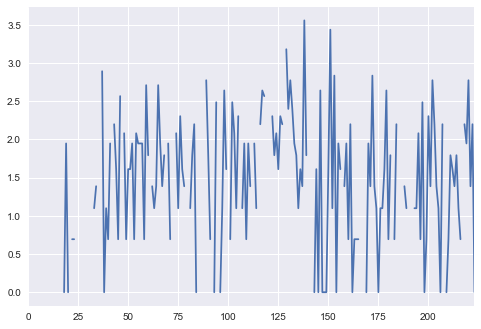

In [22]:
df3["y"] = np.log(df3["수량"])
df3.y.plot()
plt.show()

## 비정상화 잡기 위해서 로그취했으나 수량이 0 인값이 데이터가 비는 현상
## 승수 아이디어 --> 어차피 로그취할거 모든 값에 1씩 더해서 보정 하기 

In [23]:
## 모든 값에 1씩 더해서 보정해보자

df3['수량_1'] = df3['수량'] + 1
df3.head()

,일자,수량,y,수량_1
0,2015-04-18,1,0.000000,2
1,2015-04-25,0,-inf,1
2,2015-05-02,1,0.000000,2
3,2015-05-09,0,-inf,1
4,2015-05-16,0,-inf,1


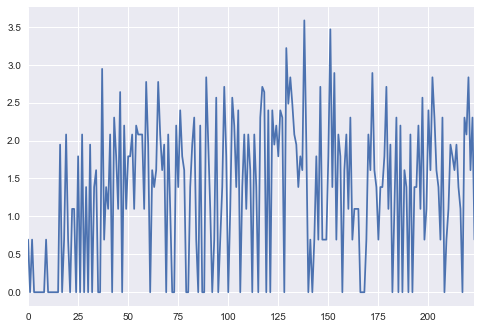

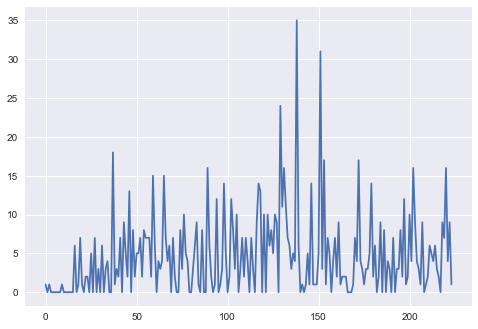

In [24]:
## 수량 값에 1씩 더하고 다시 plot 찍어보기

df3["y_1"] = np.log(df3["수량_1"])
df3.y_1.plot()
plt.show()

plt.plot(df1['수량'])
plt.show()

## log를 취해서 변환을 한다. 그 이유는 우리의 데이터는 계속해서 분산이 변화하는 데이터로서 
## 랜덤워크이다. 이 변화하는 분산을 잡아주기 위해 변환을 취한다. 

## 추세를 잡기위해서는 차분을 하면 된다. 하지만 지금 변환한 데이터가 추세가 있다고 봐야하는가?

In [25]:
df3.head()

,일자,수량,y,수량_1,y_1
0,2015-04-18,1,0.000000,2,0.693147
1,2015-04-25,0,-inf,1,0.000000
2,2015-05-02,1,0.000000,2,0.693147
3,2015-05-09,0,-inf,1,0.000000
4,2015-05-16,0,-inf,1,0.000000


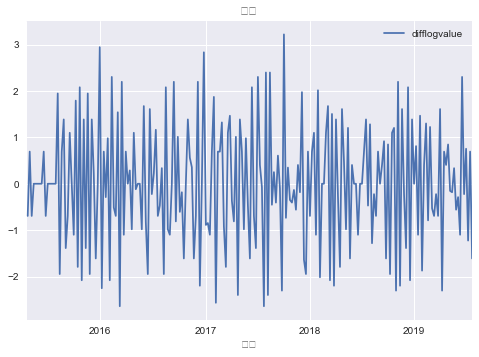

In [26]:
## 변환한 데이터에 추세가 있다고 보고 차분한 결과이다. 확실히 분산과 평균이 어느정도 안정되어 
## 정상성을 가지게 됨을 알 수 있다.

df3["difflogvalue"] = df3.y_1.diff()      # diff(periods = 1 ) -> 전 주 차분 구하기
df3.plot(x="일자", y="difflogvalue")
plt.title('차분')
plt.show()

In [27]:
df3.head()

,일자,수량,y,수량_1,y_1,difflogvalue
0,2015-04-18,1,0.000000,2,0.693147,NaN
1,2015-04-25,0,-inf,1,0.000000,-0.693147
2,2015-05-02,1,0.000000,2,0.693147,0.693147
3,2015-05-09,0,-inf,1,0.000000,-0.693147
4,2015-05-16,0,-inf,1,0.000000,0.000000


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
일자              224 non-null datetime64[ns]
수량              224 non-null int64
y               224 non-null float64
수량_1            224 non-null int64
y_1             224 non-null float64
difflogvalue    223 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 10.6 KB


In [29]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
수량,224.0,4.633929,5.277918,0.000000,1.000000,3.000000,7.000000,35.000000
y,224.0,-inf,NaN,-inf,0.000000,1.098612,1.945910,3.555348
수량_1,224.0,5.633929,5.277918,1.000000,2.000000,4.000000,8.000000,36.000000
y_1,224.0,1.315142,0.948991,0.000000,0.693147,1.386294,2.079442,3.583519
difflogvalue,223.0,0.000000,1.299081,-2.639057,-0.867301,0.000000,0.980829,3.218876


In [30]:
df3.head()

,일자,수량,y,수량_1,y_1,difflogvalue
0,2015-04-18,1,0.000000,2,0.693147,NaN
1,2015-04-25,0,-inf,1,0.000000,-0.693147
2,2015-05-02,1,0.000000,2,0.693147,0.693147
3,2015-05-09,0,-inf,1,0.000000,-0.693147
4,2015-05-16,0,-inf,1,0.000000,0.000000


In [31]:
df = df3.drop(['수량_1','y','y_1','difflogvalue'], axis=1)

In [32]:
df.set_index('일자', inplace = True)

In [33]:
time_series = df['수량']
type(time_series)

pandas.core.series.Series

월평균으로 데이터 추세 확인


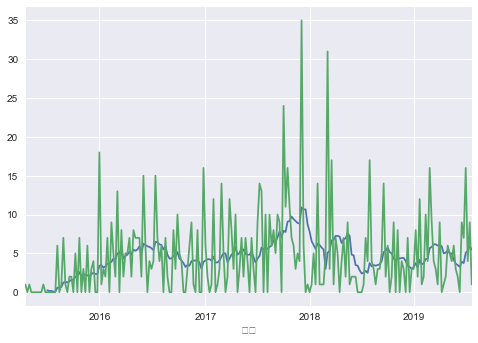



52주로 데이터 추세 확인


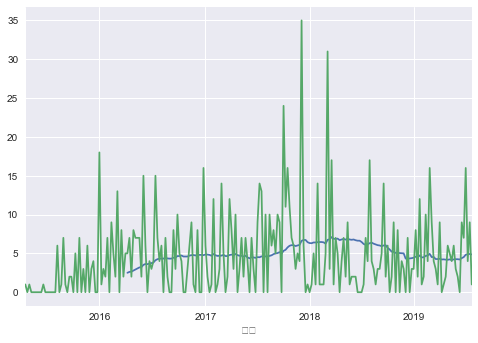

In [34]:
# 월평균으로 데이터 추세 확인

print("월평균으로 데이터 추세 확인")
time_series.rolling(12).mean().plot(label = 'month' )
time_series.plot()
plt.show()

print('\n')
# 52주로 데이터 추세 확인 
print("52주로 데이터 추세 확인")
time_series.rolling(52).mean().plot(label = 'weeks' )
time_series.plot()
plt.show()

12달 데이터 추세 및 변동


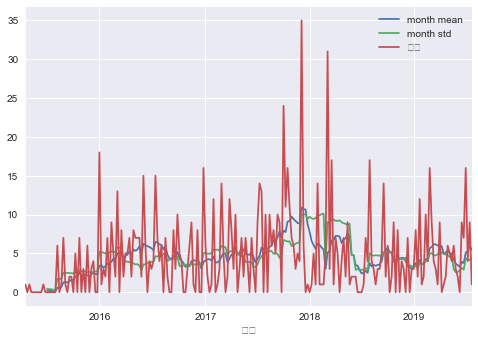

In [35]:
## 추세와 변동 확인하기 
time_series.rolling(12).mean().plot(label = 'month mean' )
time_series.rolling(12).std().plot(label = 'month std' )
time_series.plot()

plt.legend()
print('12달 데이터 추세 및 변동')
plt.show()

52주 데이터 추세 및 변동


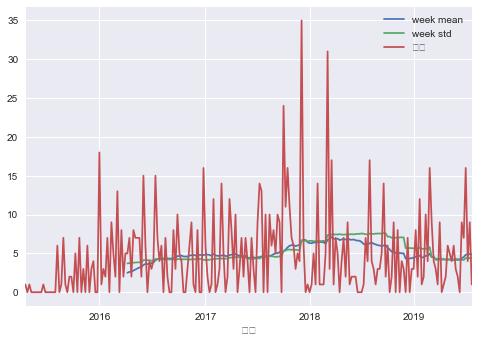

In [36]:
## 추세와 변동 확인하기 
time_series.rolling(52).mean().plot(label = 'week mean' )
time_series.rolling(52).std().plot(label = 'week std' )
time_series.plot()

plt.legend()
print('52주 데이터 추세 및 변동')
plt.show()


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
decomp = seasonal_decompose(time_series)

시계열 데이터 분해


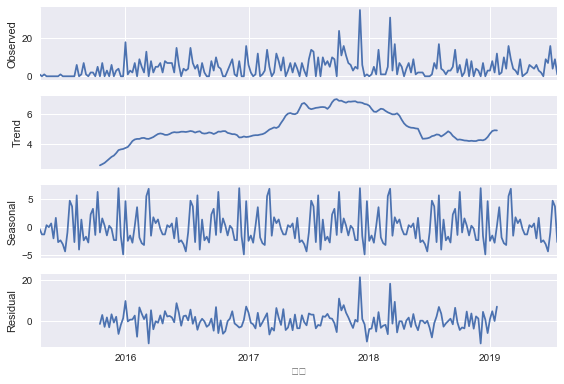

In [39]:
## 다음 시계열 데이터를 분해해보자 

print('시계열 데이터 분해')
decomp.plot()

In [40]:
df4 = df3.copy()
df4 = df3.drop(['수량','y','수량_1','y_1'], axis = 1)
df4.drop(0, inplace = True)
df4.set_index('일자',inplace = True)
df4.tail()

,difflogvalue
일자,
2019-06-29,-0.223144
2019-07-06,0.753772
2019-07-13,-1.223775
2019-07-20,0.693147
2019-07-27,-1.609438


# ----------------------------------------------------------------------

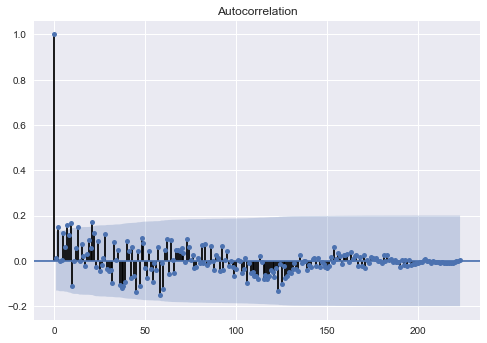

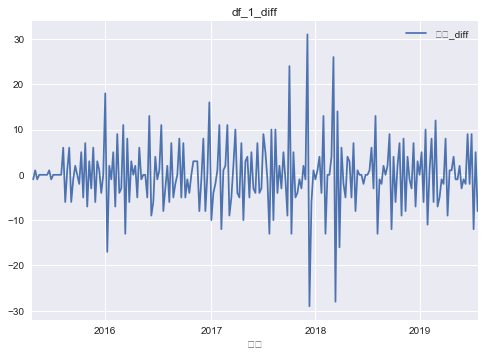

In [44]:
# 주별데이터를 차분한 데이터

df_1 = df.copy()
df_1['수량_diff'] = df["수량"].diff() 
df_1.plot(y="수량_diff")
plt.title('df_1_diff')
plt.show()

In [45]:
df_1.head()
df_1.drop('수량', axis=1, inplace = True)
df_1 = df_1[1:]
df_1.head()

,수량_diff
일자,
2015-04-25,-1.0
2015-05-02,1.0
2015-05-09,-1.0
2015-05-16,0.0
2015-05-23,0.0


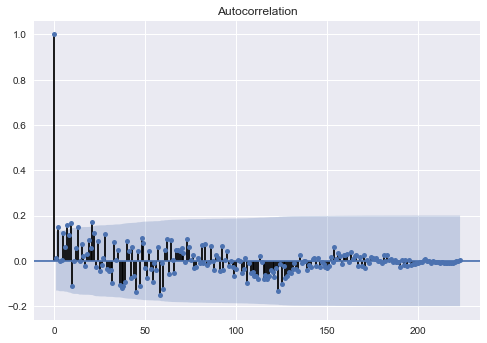

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [47]:
# df_diff = df.diff(peridos = 1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model 


In [48]:
# train 및 test 사이즈 나누기 
x = df.values
print('15년 10월 ~ 19년 8월 까지의 주차 수: '+ str(x.size)+'주')

# x.size

train = x[0:176]
test = x[176:]

predictions = []

15년 10월 ~ 19년 8월 까지의 주차 수: 224주


#### 다음은 AR_model의 코드이다.  (auto reggresive AR model) 

In [97]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [50]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [51]:
predictions = model_ar_fit.predict(start = 176, end = 224)

In [52]:
# 예측해야하는 주 48주
224-176

48

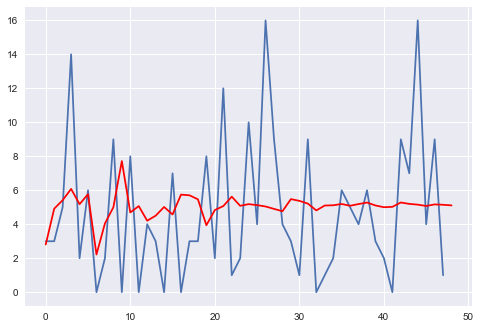

In [54]:
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

#### ARIMA model

In [96]:
from statsmodels.tsa.arima_model import ARIMA

In [56]:
# p,d,q 
# p = periods taken for autoreggressive model
# d -> Integrated order, difference 
# q = periods in moving average model

model_arima = ARIMA(train, order = (3,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1099.6105507637672


In [57]:
## statsmodels : 0.8.0 인경우에 
## float32가 int32 반영 노노노 오류 계속남 버전을 올리던 내리던 해야함

import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

statsmodels: 0.9.0


In [58]:
predictions = model_arima_fit.forecast(steps = 48)[0]
predictions

array([5.13671573, 4.85968485, 5.14564451, 4.79939345, 4.88372066,
       4.87385252, 4.93180804, 4.94657797, 4.97400724, 4.99399214,
       5.01841688, 5.0412848 , 5.06497911, 5.08820749, 5.11161899,
       5.13493833, 5.15830735, 5.18165536, 5.20501366, 5.22836659,
       5.2517219 , 5.27507607, 5.29843082, 5.3217853 , 5.34513991,
       5.36849445, 5.39184903, 5.41520359, 5.43855816, 5.46191273,
       5.48526729, 5.50862186, 5.53197642, 5.55533099, 5.57868556,
       5.60204012, 5.62539469, 5.64874926, 5.67210382, 5.69545839,
       5.71881295, 5.74216752, 5.76552209, 5.78887665, 5.81223122,
       5.83558578, 5.85894035, 5.88229492])

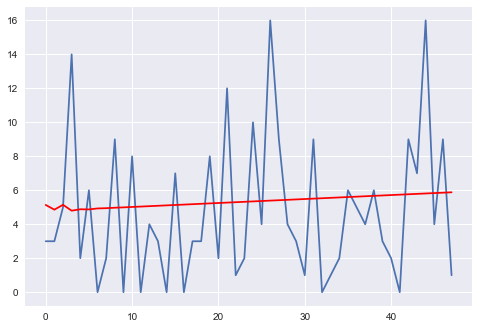

In [59]:
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

In [60]:
# 모든 파라미터 list 형태로 만들기

import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [61]:

# 오류 무시하기
import warnings
warnings.filterwarnings('ignore')

# 모든 파라미터 값을 계산하기 
for param in pdq:
    try:
        model_arima = ARIMA(train, order = param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
        
# (3, 1, 3) 1095.0549564771948 확인

(0, 0, 0) 1105.4498813178661
(0, 0, 1) 1107.2863964990247
(0, 0, 2) 1106.050735053672
(0, 0, 3) 1108.0501024006148
(0, 0, 4) 1109.9982505994813
(0, 1, 0) 1214.9248394386302
(0, 1, 1) 1095.8380915482726
(0, 2, 0) 1406.3755654772958
(0, 2, 1) 1216.1520868772736
(1, 0, 0) 1107.2415716154587
(1, 1, 0) 1152.8773507435399
(1, 1, 1) 1096.8659071818254
(1, 1, 2) 1098.5068437587395
(1, 1, 3) 1100.4290573733863
(1, 1, 4) 1100.5337088649671
(1, 2, 0) 1284.8129511844645
(2, 0, 0) 1105.89822095739
(2, 0, 1) 1111.172260054088
(2, 0, 2) 1111.3153303494134
(2, 1, 0) 1140.3784497499794
(2, 1, 1) 1098.6364187790177
(2, 1, 2) 1100.4555637267497
(2, 1, 3) 1093.4807784616296
(2, 1, 4) 1094.9948686722134
(2, 2, 0) 1238.5187687861426
(3, 0, 0) 1107.825494311936
(3, 0, 1) 1109.800042582301
(3, 0, 2) 1113.2533964036156
(3, 0, 3) 1108.9708933919399
(3, 1, 0) 1133.5967803234162
(3, 1, 1) 1099.6105507637672
(3, 1, 2) 1100.5259694715958
(3, 1, 3) 1095.0549564771948
(3, 2, 0) 1219.6141021305455
(4, 0, 0) 1109.74624

In [63]:
# p,d,q 
# p = periods taken for autoreggressive model
# d -> Integrated order, difference 
# q = periods in moving average model

model_arima = ARIMA(train, order = (3,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1133.5967803234162


In [64]:
predictions = model_arima_fit.forecast(steps = 48)[0]
predictions

array([5.92886914, 3.26432188, 3.63999816, 3.46904045, 4.07244971,
       3.64031136, 3.78946336, 3.77315265, 3.85924657, 3.80954286,
       3.85659298, 3.86587669, 3.89196449, 3.90014618, 3.92318457,
       3.93888377, 3.95769794, 3.97402836, 3.99254192, 4.00976803,
       4.02758065, 4.04502087, 4.06277741, 4.0803228 , 4.097975  ,
       4.11556721, 4.13320577, 4.15081114, 4.1684351 , 4.18604899,
       4.20366987, 4.22128565, 4.23890453, 4.25652171, 4.27413997,
       4.29175745, 4.30937544, 4.32699313, 4.34461101, 4.36222876,
       4.37984659, 4.39746437, 4.41508219, 4.43269998, 4.45031779,
       4.46793559, 4.48555339, 4.50317119])

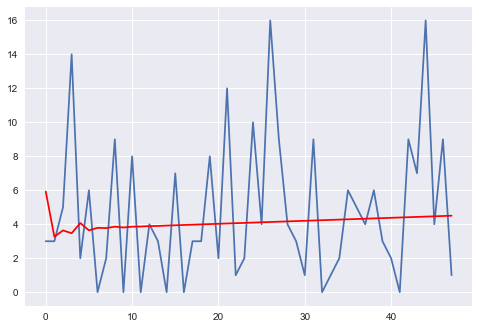

In [65]:
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

In [68]:
# mse 도 활용해보자 
# model_fit.summary()

NameError: name 'model_fit' is not defined

In [69]:
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -561.798
Method:                       css-mle   S.D. of innovations              5.986
Date:                Wed, 21 Aug 2019   AIC                           1133.597
Time:                        21:45:55   BIC                           1149.421
Sample:                             1   HQIC                          1140.015
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.187      0.094      0.925      -0.348       0.383
ar.L1.D.y     -0.7735      0.074    -10.489      0.000      -0.918      -0.629
ar.L2.D.y     -0.4411      0.088     -4.997      0.0

## time_week_final.csv 오늘 수요예측 마무리 친다 ! 가자! 

In [2]:
df = pd.read_csv('time_week_final.csv')
df['일자'] = pd.to_datetime(df['일자'],format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 3 columns):
일자    224 non-null datetime64[ns]
주     224 non-null int64
수량    224 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.3 KB


In [4]:
df1 = df.drop('주', axis = 1)
df1 = df1.set_index('일자', inplace = True)

NameError: name 'set_index' is not defined

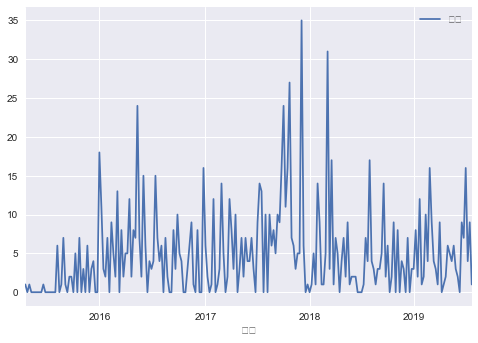

In [12]:
df1.plot()
plt.show()

In [16]:
## df2를 통해 heatmap 다시 그려보기 !! 

df2 = df.copy()
df2['year'] = df1.index.year
df2['month'] = df1.index.month
df2.rename(columns = {'수량':'count'}, inplace = True)
df2.drop(['일자','주'], axis =1 , inplace = True)

df2 = df2.groupby(['year','month'], as_index = False)['count'].sum()
df2.head()

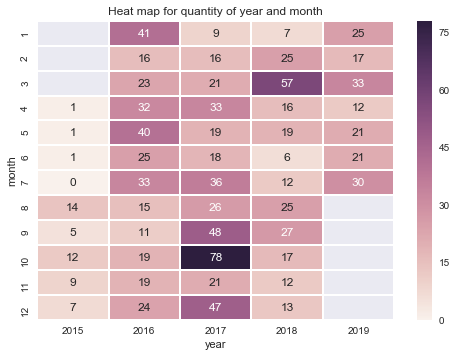

In [26]:
# 전체적으로 수량이 조금은 증가했던 것을 볼 수 있다. 

time = df2.pivot("month", "year", "count")
plt.title("Heat map for quantity of year and month")
sns.heatmap(time, annot=True, linewidths=1)
plt.show()

#### arima_time_week_final!! 

In [40]:
# arima start!! 

import statsmodels as sm
import statsmodels.api as sm
import sklearn as sk
import scipy as sp

from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA


In [32]:
## 논문에서 나온것처럼 1년 총 52주를 통해서 총 5개년을 시각화하여 표현해보기 
## 수요예측 마무리하고 오후에 해볼 과제 

time.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,NaN,41.0,9.0,7.0,25.0
2,NaN,16.0,16.0,25.0,17.0
3,NaN,23.0,21.0,57.0,33.0
4,1.0,32.0,33.0,16.0,12.0
5,1.0,40.0,19.0,19.0,21.0


In [38]:
print(df1.shape)
df1.head()

(224, 1)


,수량
일자,
2015-04-18,1
2015-04-25,0
2015-05-02,1
2015-05-09,0
2015-05-16,0


##### 시계열 데이터가 정적인가??
롤링 통계 : 롤링 평균 및 롤링 표준 편차를 플로팅합니다. 시계열은 시간에 따라 일정하게 유지되면 정지합니다 (눈으로 선이 x 축과 직선인지 평행인지 확인합니다).


Dickey-Fuller Augmented Test : p- 값이 낮고 (널 가설에 따라) 1 %, 5 %, 10 % 신뢰 구간의 임계 값이 가능한 한 ADF 통계에 가까운 경우 시계열은 정지 된 것으로 간주됩니다.

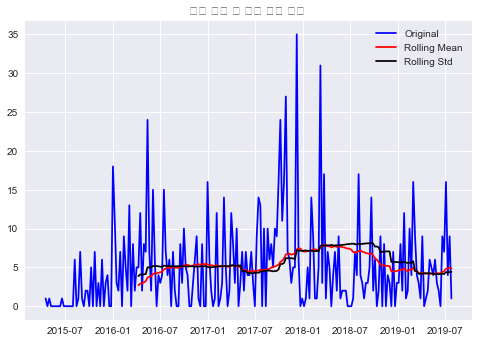

위 그림을 보면 시간에 따라 롤링 평균 및 롤링 표준 편차가 증가했다가 내려가고 일정하지 않음을 알 수 있다.
따라서 우리 데이터는 정적이지 않다.


In [87]:
## 1. 시계열이 정적인가를 확인해보기
## 1년 총 52주 기준 

rolling_mean = df1.rolling (window = 52) .mean () 
rolling_std = df1.rolling (window = 52) .std () 
plt.plot (df1, color = 'blue', label = 'Original') 
plt.plot (rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot (rolling_std, color = 'black', label = 'Rolling Std') 
plt.legend (loc = 'best') 
plt.title ( '롤링 평균 및 롤링 표준 편차 ') 
plt.show ()

print('위 그림을 보면 시간에 따라 롤링 평균 및 롤링 표준 편차가 증가했다가 내려가고 일정하지 않음을 알 수 있다.')
print('따라서 우리 데이터는 정적이지 않다.')

In [59]:
df1.head()

,수량
일자,
2015-04-18,1
2015-04-25,0
2015-05-02,1
2015-05-09,0
2015-05-16,0


In [86]:
## adfuller를 이용하여 Dickey-Fuller Augmented Test : 
## p- 값이 낮고 (널 가설에 따라) 
## 1 %, 5 %, 10 % 신뢰 구간의 임계 값이 가능한 한 ADF 통계에 가까운 경우 시계열은 정지 된 것으로 간주됩니다. 를 확인하기 


from statsmodels.tsa.stattools import adfuller

result = adfuller(df1['수량'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -8.502322631185084
p-value: 1.2288081110868432e-13
Critical Values:
	1%: -3.460154163751041
	5%: -2.874648939216792
	10%: -2.5737567259151044


In [66]:
print('Dickey-Fuller Augmented Test결과 p-value 값이 1.22로 0.05보다 크다')
print('따라서 데이터는 non-stationary data임을 확인 할 수 있다.')

Dickey-Fuller Augmented Test결과 p-value 값이 1.22로 0.05보다 크다
따라서 데이터는 non-stationary data임을 확인 할 수 있다.


데이터 안정화 시키기!!!!

In [75]:
# 데이터에 로그를 주어서 변환을 시켰다. 
# 변환은 log  - 분산잡고 
# 차분은 diff  - 평균잡고 

df_log = df1.copy()
df_log['수량'] = df_log['수량'] +1
df_log = np.log(df_log)

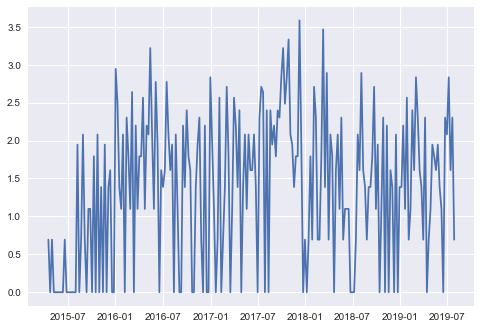

In [95]:
plt.plot(df_log)
plt.show()

In [83]:
# 주어진 시계열이 고정되어 있는지 여부를 결정하는 두 가지 테스트를 실행하는 함수를 만들어 봅시다.

def get_stationarity(timeseries):
    
    # rolling statistics
    # 우리 데이터는 52주 이므로 window =52 로 지정
    rolling_mean = timeseries.rolling(window=52).mean()
    rolling_std = timeseries.rolling(window=52).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    # timeseries의 알고 싶은 컬럼명 작성 
    result = adfuller(timeseries['수량'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
#deep learning 학습하기

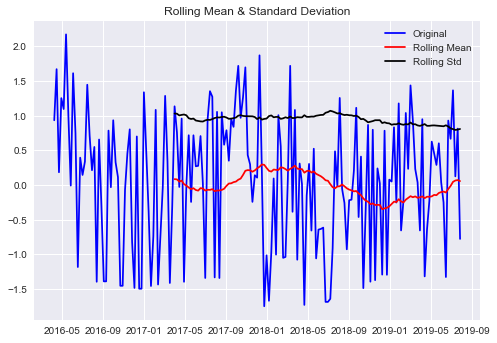

ADF Statistic: -11.217623209758885
p-value: 2.0508366306353367e-20
Critical Values:
	1%: -3.468952197801766
	5%: -2.878495056473015
	10%: -2.57580913601947


p-value값이 너무 높다 


In [90]:
rolling_mean = df_log.rolling(window=52).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

print('\n')
print('p-value값이 너무 높다 ')

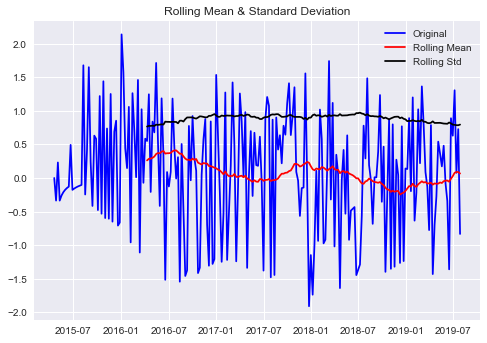

ADF Statistic: -14.802052647519492
p-value: 2.0922453524525407e-27
Critical Values:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348


rolling mean과 rolling std가 어느정도 안정됨을 알 수는 있지만 답없는거 같다... 
p-value값이 너무 높다 


In [92]:
## 지수붕괴를 사용하자

rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

print('\n')
print('rolling mean과 rolling std가 어느정도 안정됨을 알 수는 있지만 답없는거 같다... ')
print('p-value값이 너무 높다 ')

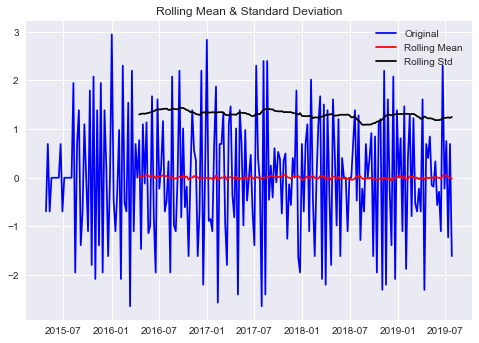

ADF Statistic: -9.331208934522662
p-value: 9.318005433028085e-16
Critical Values:
	1%: -3.461136478222043
	5%: -2.875078880098608
	10%: -2.5739861168199027


rolling mean과 rolling std가 어느정도 안정됨을 알 수는 있지만 답없는거 같다... 
p-value값이 너무 높다 


In [94]:
#시간 이동을 적용 할 때 모든 지점을 그 이전의 지점으로 뺍니다.

df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

print('\n')
print('rolling mean과 rolling std가 어느정도 안정됨을 알 수는 있지만 답없는거 같다... ')
print('p-value값이 너무 높다 ')

In [99]:
df1.head()

,수량
일자,
2015-04-18,1
2015-04-25,0
2015-05-02,1
2015-05-09,0
2015-05-16,0


In [104]:
# train 및 test 사이즈 나누기 
x = df['수량'].values
print('15년 10월 ~ 19년 8월 까지의 주차 수: '+ str(x.size)+'주')

# x.size

train = x[0:176]
test = x[176:]

predictions = []

15년 10월 ~ 19년 8월 까지의 주차 수: 224주


In [109]:
# 모든 파라미터 list 형태로 만들기

import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

# 오류 무시하기
import warnings
warnings.filterwarnings('ignore')

# 모든 파라미터 값을 계산하기 
for param in pdq:
    try:
        model_arima = ARIMA(train, order = param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue
        
# (3, 1, 3) 1095.0549564771948 확인

(0, 0, 0) 1134.5741555971183
(0, 0, 1) 1132.8816585583659
(0, 0, 2) 1132.4594651438542
(0, 0, 3) 1133.8100325193059
(0, 0, 4) 1134.6496742236168
(0, 1, 0) 1219.193343735358
(0, 1, 1) 1120.3957665321318
(0, 1, 2) 1122.3594394543816
(0, 2, 0) 1403.4250499999473
(0, 2, 1) 1220.392765354642
(1, 0, 0) 1131.9543961293298
(1, 0, 1) 1124.5097750471637
(1, 1, 0) 1172.9827559276862
(1, 1, 1) 1122.3589420960484
(1, 1, 2) 1124.244452927917
(1, 1, 3) 1125.9037717188935
(1, 1, 4) 1127.5939927302602
(1, 2, 0) 1302.2821760079964
(2, 0, 0) 1131.2668317081839
(2, 0, 1) 1135.8604308439378
(2, 0, 2) 1128.3060696782052
(2, 1, 0) 1158.8107826547528
(2, 1, 1) 1124.3539602182777
(2, 1, 2) 1125.9397117522801
(2, 1, 3) 1122.0630580882291
(2, 1, 4) 1124.060518340685
(2, 2, 0) 1260.0314141578428
(3, 0, 0) 1132.4494579361385
(3, 0, 1) 1128.5024717592714
(3, 0, 2) 1130.1617623086722
(3, 0, 3) 1124.520979168431
(3, 1, 0) 1148.7477492641506
(3, 1, 1) 1126.0633359724156
(3, 1, 2) 1127.67959746276
(3, 1, 3) 1124.060509

In [122]:
model_arima = ARIMA(train, order = (0,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1120.3957665321318


In [123]:
224-176

48

In [124]:
predictions = model_arima_fit.forecast(steps = 48)[0]
predictions

array([4.60815733, 4.63111085, 4.65406438, 4.6770179 , 4.69997143,
       4.72292496, 4.74587848, 4.76883201, 4.79178553, 4.81473906,
       4.83769258, 4.86064611, 4.88359963, 4.90655316, 4.92950668,
       4.95246021, 4.97541373, 4.99836726, 5.02132078, 5.04427431,
       5.06722783, 5.09018136, 5.11313488, 5.13608841, 5.15904193,
       5.18199546, 5.20494898, 5.22790251, 5.25085603, 5.27380956,
       5.29676308, 5.31971661, 5.34267013, 5.36562366, 5.38857718,
       5.41153071, 5.43448423, 5.45743776, 5.48039128, 5.50334481,
       5.52629833, 5.54925186, 5.57220538, 5.59515891, 5.61811243,
       5.64106596, 5.66401948, 5.68697301])

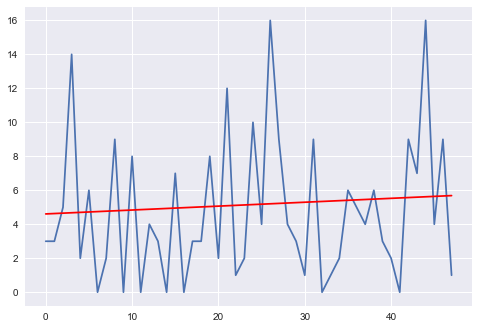

In [125]:
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

In [126]:
print(model_arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  175
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -557.198
Method:                       css-mle   S.D. of innovations              5.814
Date:                Thu, 22 Aug 2019   AIC                           1120.396
Time:                        13:53:02   BIC                           1129.890
Sample:                    04-25-2015   HQIC                          1124.247
                         - 07-27-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0230      0.046      0.500      0.618      -0.067       0.113
ma.L1.D.y     -0.9012      0.037    -24.673      0.000      -0.973      -0.830
                                    Roots           

## df는 주별 수량
## df4는 주별 수량을 변환하고 차분하여 안정시킨 데이터
## df_diff 은 주별 수량을 차분한 데이터

In [140]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

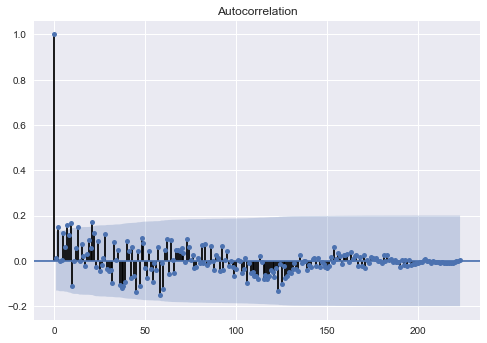

In [146]:
plot_acf(df)


# 해석이 맞는지 확인할 필요가 있다.!! 

# 첫 번째 또는 두 번째 시차에서의 유의한 상관 뒤에 유의하지 않은 상관이 있음.

# 데이터에 이동 평균[MA] 항이 있음.
# 유의한 상관의 수가 이동 평균[MA] 항의 차수를 나타냅니다.

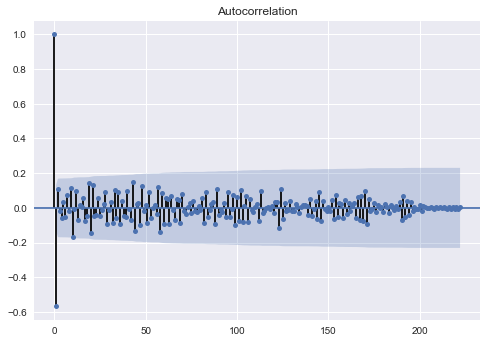

In [147]:
plot_acf(df4)


# 해석이 맞는지 확인할 필요가있다!! 
# 데이터에 고차 자기 회귀 항이 있음.
# 자기 회귀 항의 차수를 확인하려면 편 자기 상관 함수를 사용하십시오.

In [ ]:
df4.d

In [173]:
m = sm.tsa.ARIMA(df3.y, [0,1,1])
r = m.fit()
print(r.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.수량   No. Observations:                  223
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -296.466
Method:                       css-mle   S.D. of innovations              0.910
Date:                Tue, 20 Aug 2019   AIC                            598.933
Time:                        22:01:21   BIC                            609.154
Sample:                    04-25-2015   HQIC                           603.059
                         - 07-27-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.005      1.161      0.247      -0.004       0.015
ma.L1.D.수량    -0.9238      0.027    -34.852      0.000      -0.976      -0.872
                                    Roots           

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [174]:
r.plot_predict(end="2019-8", plot_insample=False);

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [175]:
df3[0:-1]

일자
2015-04-18           0
2015-04-25        -inf
2015-05-02           0
2015-05-09        -inf
2015-05-16        -inf
2015-05-23        -inf
2015-05-30        -inf
2015-06-06        -inf
2015-06-13        -inf
2015-06-20           0
2015-06-27        -inf
2015-07-04        -inf
2015-07-11        -inf
2015-07-18        -inf
2015-07-25        -inf
2015-08-01        -inf
2015-08-08     1.79176
2015-08-15        -inf
2015-08-22           0
2015-08-29     1.94591
2015-09-05           0
2015-09-12        -inf
2015-09-19    0.693147
2015-09-26    0.693147
2015-10-03        -inf
2015-10-10     1.60944
2015-10-17        -inf
2015-10-24     1.94591
2015-10-31        -inf
2015-11-07     1.09861
                ...   
2019-01-05     1.09861
2019-01-12     2.07944
2019-01-19    0.693147
2019-01-26     2.48491
2019-02-02           0
2019-02-09    0.693147
2019-02-16     2.30259
2019-02-23     1.38629
2019-03-02     2.77259
2019-03-09     2.19722
2019-03-16     1.38629
2019-03-23     1.09861
2019-03-

In [161]:
df3[0:-1] = 2 ** df3[0:-1]

In [162]:
df3[0:-1]

일자
2015-04-18    3.06695
2015-04-25          2
2015-05-02    3.06695
2015-05-09          2
2015-05-16          2
2015-05-23          2
2015-05-30          2
2015-06-06          2
2015-06-13          2
2015-06-20    3.06695
2015-06-27          2
2015-07-04          2
2015-07-11          2
2015-07-18          2
2015-07-25          2
2015-08-01          2
2015-08-08    14.4481
2015-08-15          2
2015-08-22    3.06695
2015-08-29    18.7191
2015-09-05    3.06695
2015-09-12          2
2015-09-19    4.41216
2015-09-26    4.41216
2015-10-03          2
2015-10-10    11.0224
2015-10-17          2
2015-10-24    18.7191
2015-10-31          2
2015-11-07    6.12226
               ...   
2019-01-05    6.12226
2019-01-12    24.0166
2019-01-19    4.41216
2019-01-26    60.4363
2019-02-02    3.06695
2019-02-09    4.41216
2019-02-16    38.5949
2019-02-23    8.28975
2019-03-02     139.74
2019-03-09    30.5565
2019-03-16    8.28975
2019-03-23    6.12226
2019-03-30    3.06695
2019-04-06    30.5565
2019-04

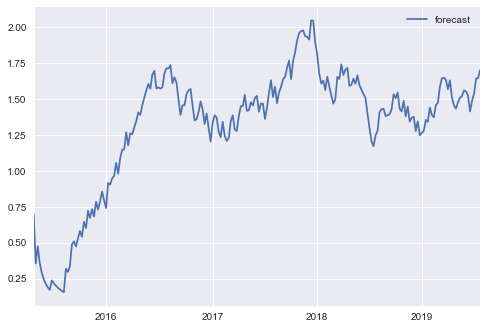

In [145]:
plt.show()

In [146]:
df3.tail()

일자
2019-07-06 00:00:00                                              2.83321
2019-07-13 00:00:00                                              1.60944
2019-07-20 00:00:00                                              2.30259
2019-07-27 00:00:00                                             0.693147
y                      일자
2015-04-18    0.693147
2015-04-25    0.0000...
Name: 수량, dtype: object

In [101]:
df2.tail()

,주,수량
일자,,
2019-06-29,220,7
2019-07-06,221,16
2019-07-13,222,4
2019-07-20,223,9
2019-07-27,224,1


In [ ]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """

    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg